In [1]:
import matplotlib.pyplot as plt
import datetime
import os
import json
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
)
import numpy as np
from main_pygod import get_data_from_loader, load_dataset, make_loader, create_model, train_model, test_model
import warnings

In [2]:
def create_metrics():
    return {"overall": {"roc_auc": [], "accuracy": [],"f1": [], "precision": [], "recall": []},
            "licit": {"precision": [], "recall": [],"f1-score": []}, 
           "illicit":{"precision": [], "recall": [],"f1-score": []}}

def hyperparameter_loop(group_para, parameter, parameter_list, metrics):
    """
    Run a grid search for a hyperparameter
    Args: hyperparameter, hyperparameter list, classification metrics (empty dict)
    Returns: Classification metrics dictionary
    """ 
    warnings.filterwarnings('ignore')
    for i in range(len(parameter_list)):
        config[group_para][parameter] = parameter_list[i]
        dataset, input_nodes = load_dataset(mask="train",use_aggregated=config["data"]["use_aggregated"],use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes)
        train_data = get_data_from_loader(loader)

        mymodel = create_model(config=config["model"])

        trained_model = train_model(mymodel, train_data)
    
        dataset, input_nodes = load_dataset(mask="test",use_aggregated=config["data"]["use_aggregated"],
        use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes,)    
        test_data = get_data_from_loader(loader)

        test_metrics = test_model(model=trained_model, data=test_data, output_directory=config["training"]["save_dir"])

        for key in list(test_metrics.keys())[0:-1]:
            metrics["overall"][key].append(test_metrics[key])
        output = test_metrics["classification_report"]
        for key in list(output["0"].keys())[0:-1]:
            metrics["licit"][key].append(output["0"][key])
            metrics["illicit"][key].append(output["1"][key])
        
    return metrics

def plot_metrics(metrics, para_list, parameter, x_log = False):
    """
    Plot the classification metrics
    Args:classification metrics
    Returns:None
    """ 

    size = (8,3)
    plt.figure(figsize= size)
    for key in list(metrics["overall"]):
        plt.plot(para_list, metrics["overall"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Total Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Overall Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["licit"]):
        plt.plot(para_list, metrics["licit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Licit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Licit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["illicit"]):
        plt.plot(para_list, metrics["illicit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Illicit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Illicit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

## Base DOMINANT

In [3]:
config = {
        "model": {
            "hid_dim": 128,
            "num_layers": 4,
            "dropout": 0.2,
            "weight_decay": 0.0,
            "contamination": 0.1,
            "backbone": "gcn",
            "lr": 0.005,
            "epoch": 10,
            "batch_size": 2048,
            "num_neigh": 10,
            "weight": 0.5,
            "verbose": 1,
        },
        "data": {
            "use_aggregated": True,
            "use_temporal": False,
            "batch_size": 16000
        },
        "training": {
            "save_embeddings": False,
            "save_dir": "./saved_models",
        },
        "classifiers": ["rf", "mlp"],
    }

#### Number of layers

In [ ]:
metrics = create_metrics()
para_change = "num_layers"
para_list = [2, 3, 4, 5, 6,7]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30388, 165], edge_index=[2, 28921], y=[30388])
creating model with {'hid_dim': 128, 'num_layers': 2, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x7f3239120820>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 4008.4233 | 
Epoch 0001: Loss 2545.7986 | 
Epoch 0002: Loss 2309.2871 | 
Epoch 0003: Loss 1064.7992 | 
Epoch 0004: Loss 317.6918 | 
Epoch 0005: Loss 213.9958 | 
Epoch 0006: Loss 165.2288 | 
Epoch 0007: Loss 137.1315 | 
Epoch 0008: Loss 115.1327 | 
Epoch 0009: Loss 96.1435 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[24920, 165], edge_index=[2, 22780], y=[24920])
testing model...
Test: Loss 0.5310 | 
ROC AUC: 0.3502
Classification Re

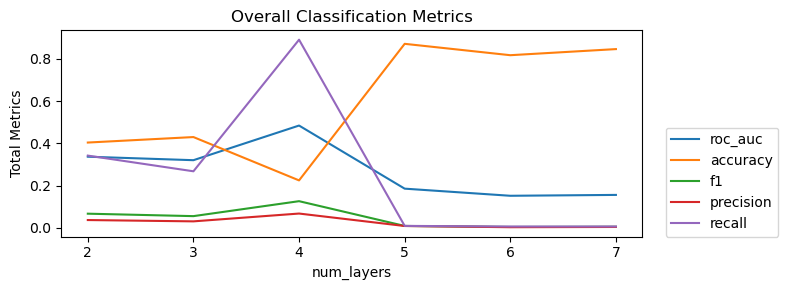

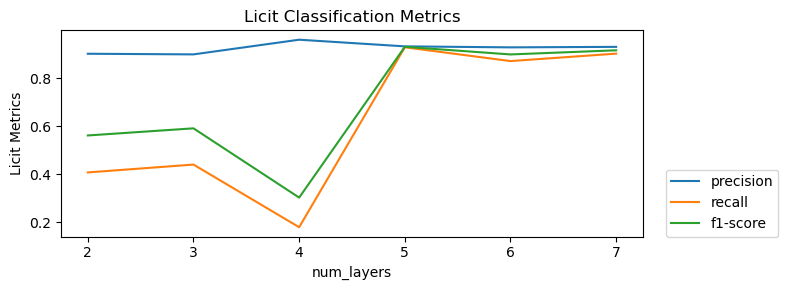

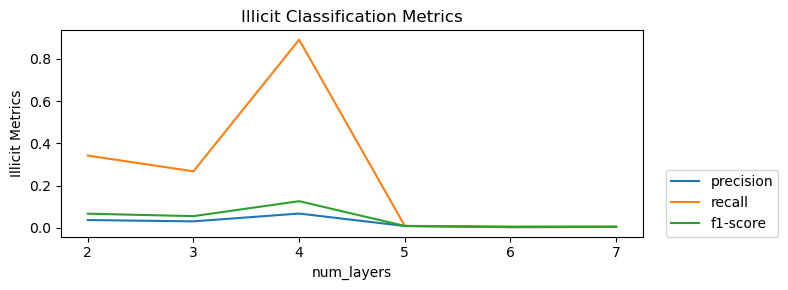

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Hidden Dimension

In [ ]:
metrics = create_metrics()
para_change = "hid_dim"
para_list = [64, 128, 256, 512, 1024]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 93], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 64, 'num_layers': 7, 'dropout': 0.1, 'weight_decay': 0.0, 'act': <function relu at 0x000001B984151B40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 2, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 75.0079 |  | Time 2.14
Epoch 0001: Loss 5.8138 |  | Time 2.11
Epoch 0002: Loss 4.7606 |  | Time 2.17
Epoch 0003: Loss 4.5742 |  | Time 2.20
Epoch 0004: Loss 4.4691 |  | Time 2.14
Epoch 0005: Loss 4.3331 |  | Time 2.14
Epoch 0006: Loss 4.3543 |  | Time 2.08
Epoch 0007: Loss 4.2735 |  | Time 2.11
Epoch 0008: Loss 4.2475 |  | Time 2.22
Epoch 0009: Loss 4.2057 |  | Time 2.20
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[24837, 93], edge_i

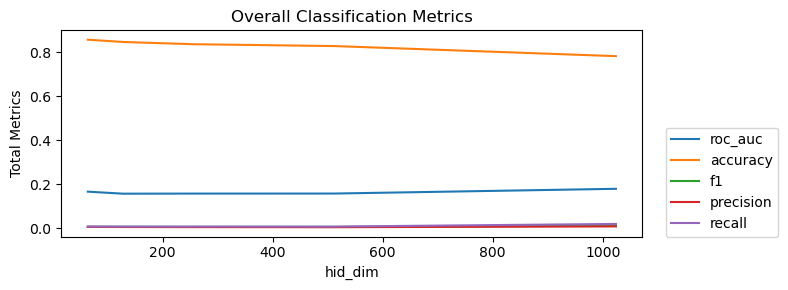

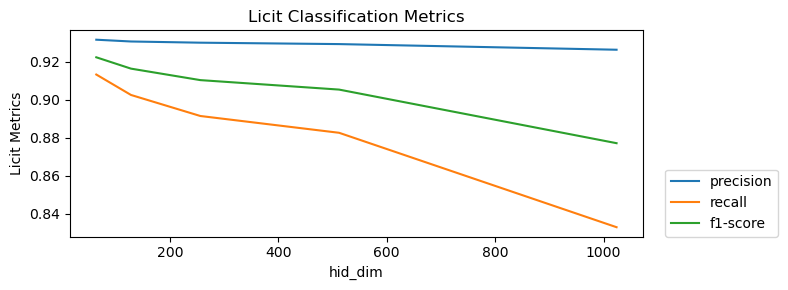

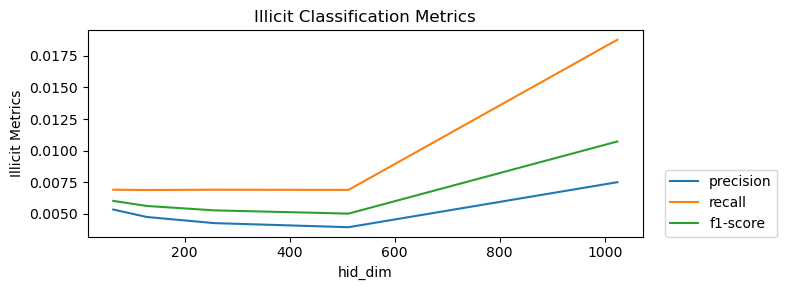

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Dropout

In [ ]:
metrics = create_metrics()
para_change = "dropout"
para_list = [0.0, 0.1, 0.2, 0.3]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 93], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.0, 'weight_decay': 0.0, 'act': <function relu at 0x000001B984151B40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 2, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 343555.2064 |  | Time 15.83
Epoch 0001: Loss 12.2186 |  | Time 15.73
Epoch 0002: Loss 9.6054 |  | Time 15.82
Epoch 0003: Loss 7.5636 |  | Time 15.90
Epoch 0004: Loss 6.0260 |  | Time 15.75
Epoch 0005: Loss 5.1726 |  | Time 15.78
Epoch 0006: Loss 5.1298 |  | Time 15.83
Epoch 0007: Loss 5.1956 |  | Time 15.73
Epoch 0008: Loss 5.2537 |  | Time 15.72
Epoch 0009: Loss 5.1253 |  | Time 15.76
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[2

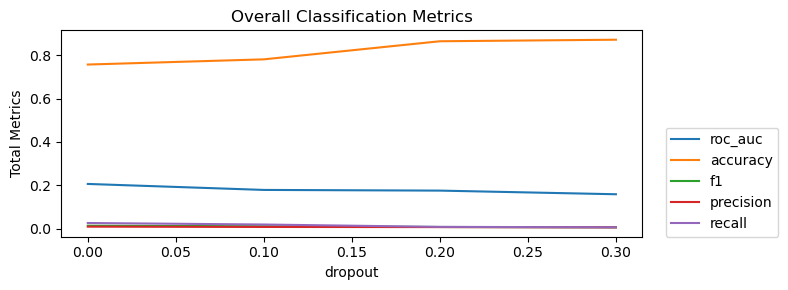

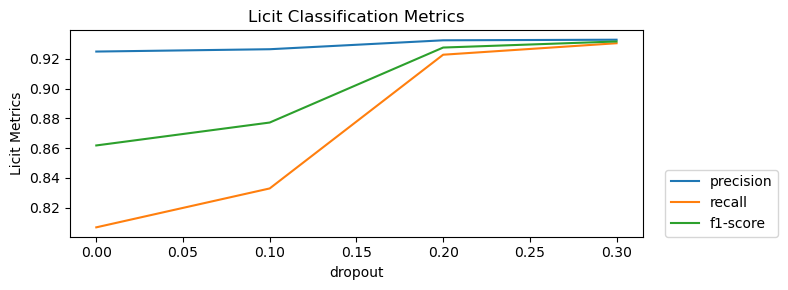

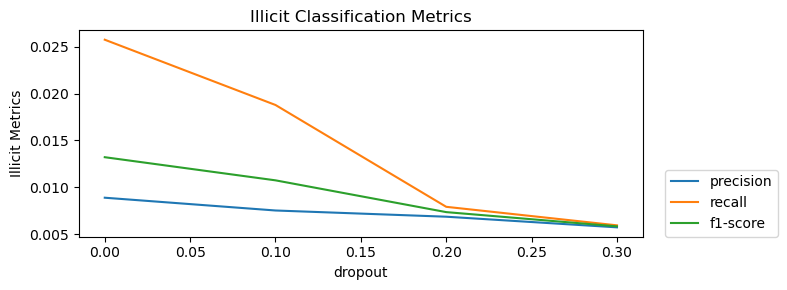

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Number of neighbors

In [ ]:
metrics = create_metrics()
para_change = "num_neigh"
para_list = [5,10,15,20]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 93], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x000001B984151B40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 5, 'weight': 0.5, 'verbose': 2, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 244112.0599 |  | Time 14.60
Epoch 0001: Loss 15.0232 |  | Time 14.44
Epoch 0002: Loss 17.2090 |  | Time 14.58
Epoch 0003: Loss 16.6528 |  | Time 14.42
Epoch 0004: Loss 15.2497 |  | Time 14.56
Epoch 0005: Loss 13.8527 |  | Time 15.20
Epoch 0006: Loss 12.4560 |  | Time 15.26
Epoch 0007: Loss 11.3042 |  | Time 15.19
Epoch 0008: Loss 10.0723 |  | Time 15.11
Epoch 0009: Loss 8.9720 |  | Time 15.19
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Dat

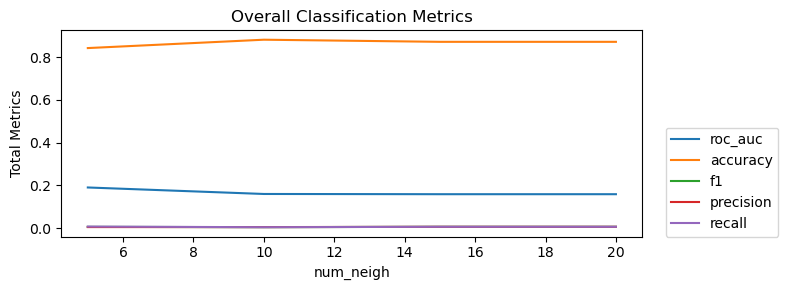

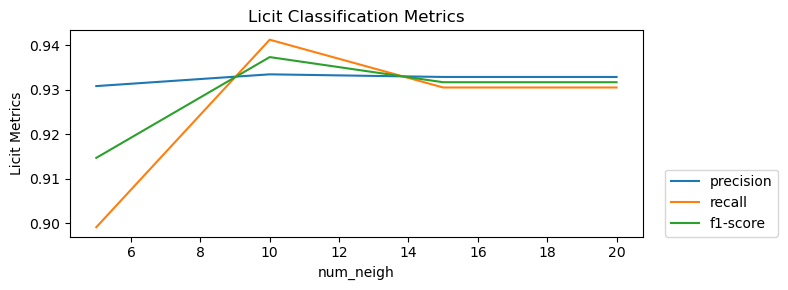

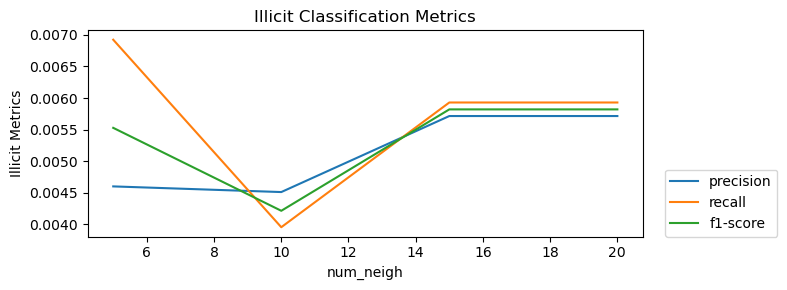

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Epochs

In [ ]:
metrics = create_metrics()
para_change = "epoch"
para_list = [10, 20 , 30 , 40, 50]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 93], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x000001B984151B40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 20, 'weight': 0.5, 'verbose': 2, 'backbone': <class 'torch_geometric.nn.models.basic_gnn.GCN'>}
training model...
Epoch 0000: Loss 191809.7530 |  | Time 16.19
Epoch 0001: Loss 15.4998 |  | Time 16.19
Epoch 0002: Loss 17.6917 |  | Time 16.65
Epoch 0003: Loss 16.8753 |  | Time 16.62
Epoch 0004: Loss 15.4918 |  | Time 16.91
Epoch 0005: Loss 13.9623 |  | Time 16.78
Epoch 0006: Loss 12.4310 |  | Time 16.58
Epoch 0007: Loss 12.7266 |  | Time 16.42
Epoch 0008: Loss 9.9158 |  | Time 16.52
Epoch 0009: Loss 8.8694 |  | Time 16.72
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Dat

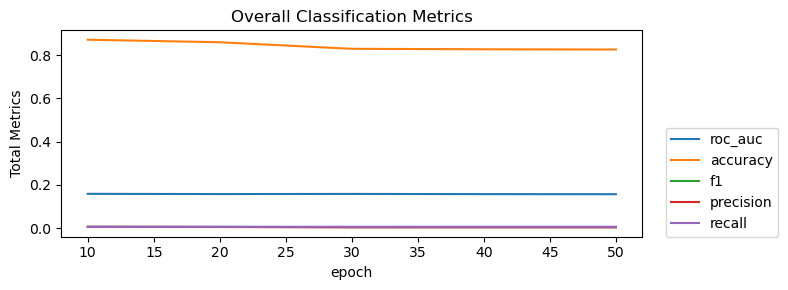

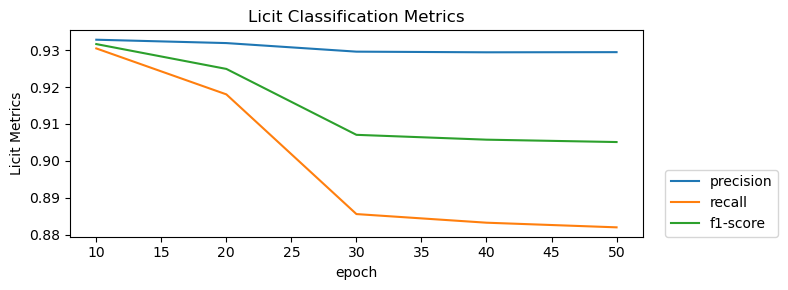

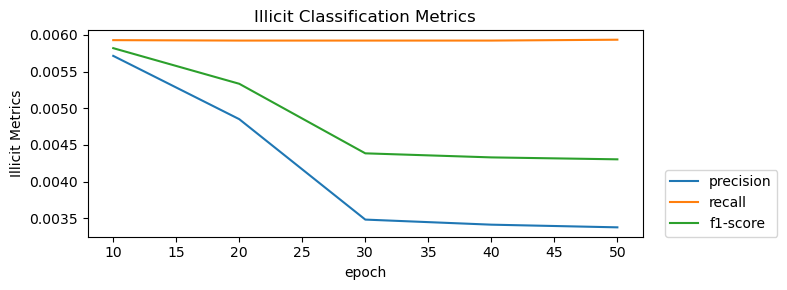

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

## DOMINANT using GAT backbone

In [ ]:
config = {
        "model": {
            "hid_dim": 128,
            "num_layers": 4,
            "dropout": 0.2,
            "weight_decay": 0.0,
            "contamination": 0.1,
            "backbone": "gat",
            "lr": 0.005,
            "epoch": 10,
            "batch_size": 2048,
            "num_neigh": 10,
            "weight": 0.5,
            "verbose": 1,
        },
        "data": {
            "use_aggregated": True,
            "use_temporal": False,
            "batch_size": 16000
        },
        "training": {
            "save_embeddings": False,
            "save_dir": "./saved_models",
        },
        "classifiers": ["rf", "mlp"],
    }

#### Number of layers

In [ ]:
metrics = create_metrics()
para_change = "num_layers"
para_list = [2, 3, 4, 5, 6,7]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30442, 165], edge_index=[2, 28954], y=[30442])
creating model with {'hid_dim': 128, 'num_layers': 2, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001B984151B40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 557.8431 | 
Epoch 0001: Loss 95.0433 | 
Epoch 0002: Loss 37.5525 | 
Epoch 0003: Loss 17.2409 | 
Epoch 0004: Loss 13.9958 | 
Epoch 0005: Loss 9.3877 | 
Epoch 0006: Loss 7.8442 | 
Epoch 0007: Loss 7.3078 | 
Epoch 0008: Loss 7.0031 | 
Epoch 0009: Loss 6.8272 | 
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[25017, 165], edge_index=[2, 22854], y=[25017])
testing model...
Test: Loss 0.0997 | 
ROC AUC: 0.2433
Classification Report:
               precisi

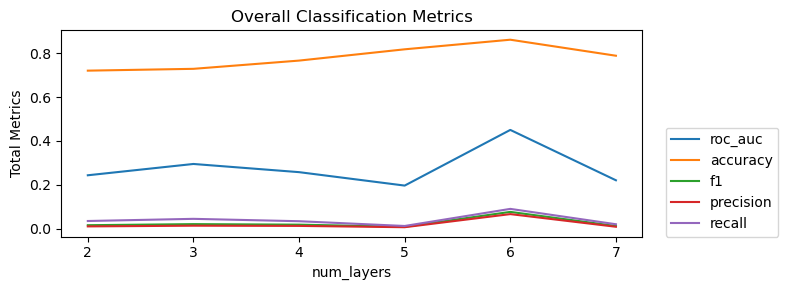

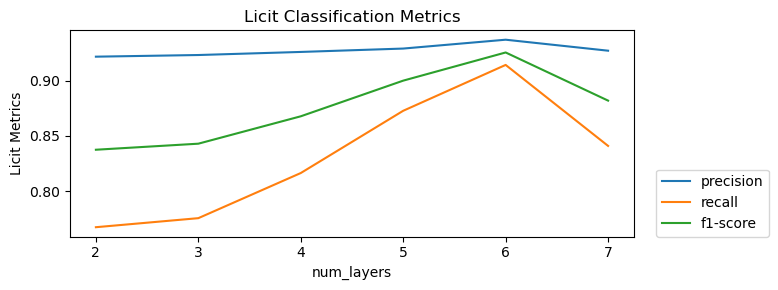

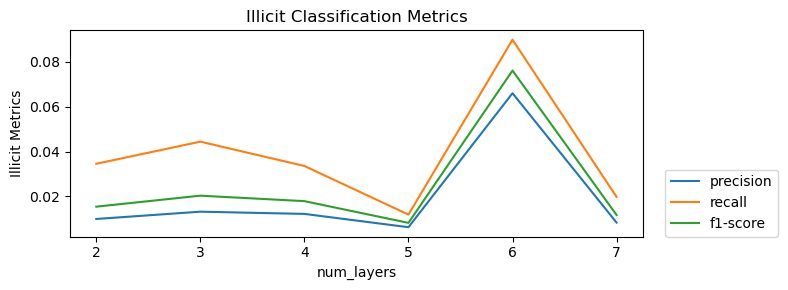

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Hidden Dimension

In [ ]:
metrics = create_metrics()
para_change = "hid_dim"
para_list = [64, 128, 256, 512, 1024]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 165], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 64, 'num_layers': 7, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x000001B984151B40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 163.5190 | 
Epoch 0001: Loss 32.4388 | 
Epoch 0002: Loss 13.2821 | 
Epoch 0003: Loss 9.7696 | 
Epoch 0004: Loss 7.8192 | 
Epoch 0005: Loss 7.1884 | 
Epoch 0006: Loss 7.0487 | 
Epoch 0007: Loss 6.9288 | 
Epoch 0008: Loss 6.8218 | 
Epoch 0009: Loss 6.8842 | 
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[24952, 165], edge_index=[2, 22838], y=[24952])
testing model...
Test: Loss 0.0871 | 
ROC AUC: 0.1889
Classification Report:
               precision 

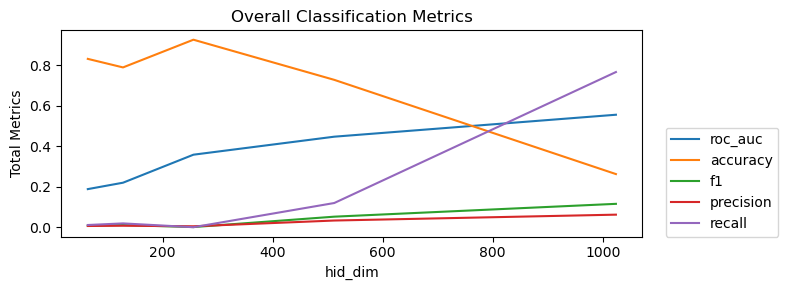

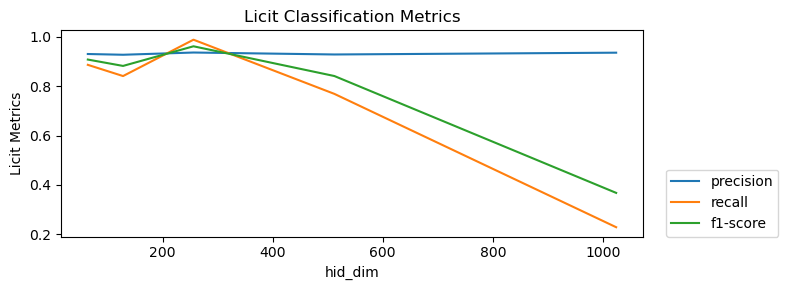

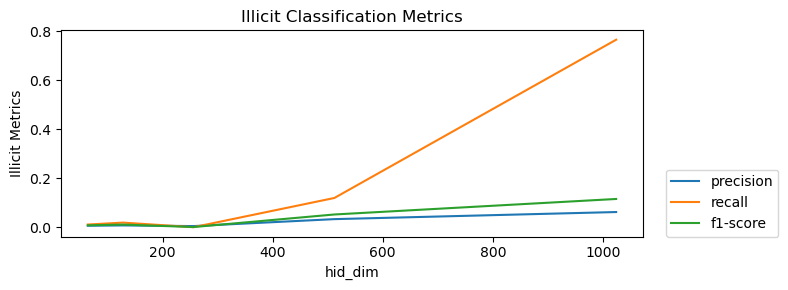

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Dropout

In [ ]:
metrics = create_metrics()
para_change = "dropout"
para_list = [0.0, 0.1, 0.2, 0.3]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 165], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.0, 'weight_decay': 0.0, 'act': <function relu at 0x000001B984151B40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 824153.0512 | 
Epoch 0001: Loss 83439.2225 | 
Epoch 0002: Loss 25306.8152 | 
Epoch 0003: Loss 10072.7338 | 
Epoch 0004: Loss 5241.0195 | 
Epoch 0005: Loss 2691.8465 | 
Epoch 0006: Loss 1385.3030 | 
Epoch 0007: Loss 751.5041 | 
Epoch 0008: Loss 499.1712 | 
Epoch 0009: Loss 398.2585 | 
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[24964, 165], edge_index=[2, 22831], y=[24964])
testing model...
Test: Loss 3.0281 | 
ROC AUC: 0.4628
Classification Rep

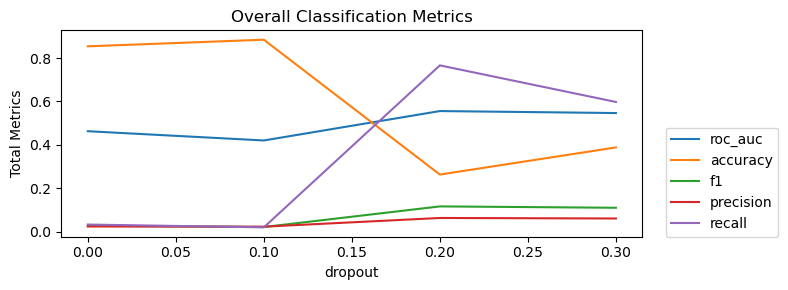

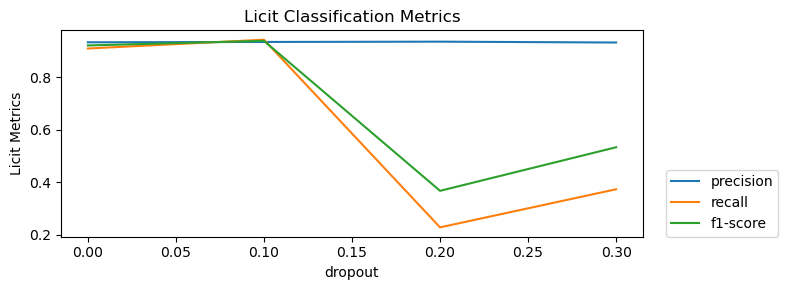

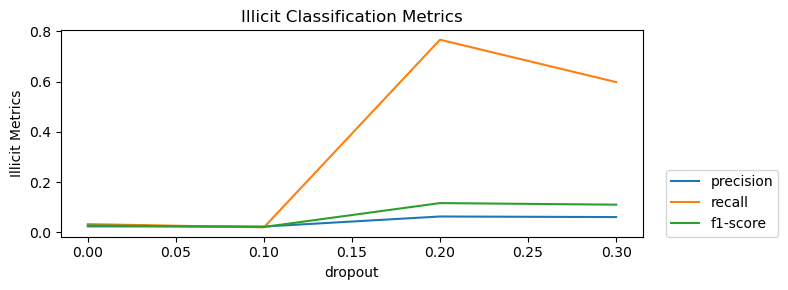

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Number of neighbors

In [ ]:
metrics = create_metrics()
para_change = "num_neigh"
para_list = [5,10,15,20]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 165], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x000001B984151B40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 5, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 562333.4328 | 
Epoch 0001: Loss 57887.5889 | 
Epoch 0002: Loss 21355.8377 | 
Epoch 0003: Loss 10934.4145 | 
Epoch 0004: Loss 8363.7109 | 
Epoch 0005: Loss 5308.5155 | 
Epoch 0006: Loss 3400.6690 | 
Epoch 0007: Loss 3040.0262 | 
Epoch 0008: Loss 2072.7109 | 
Epoch 0009: Loss 2076.9714 | 
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[24919, 165], edge_index=[2, 22820], y=[24919])
testing model...
Test: Loss 9.0628 | 
ROC AUC: 0.5690
Classification R

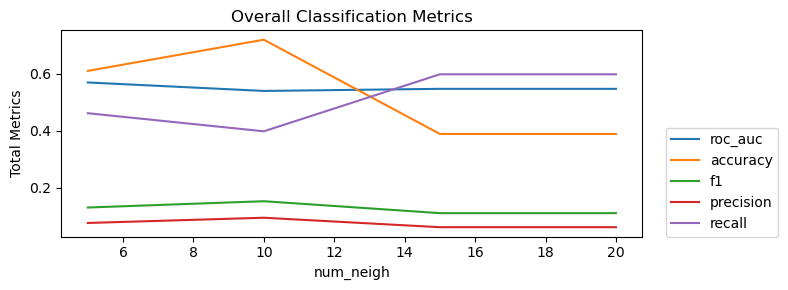

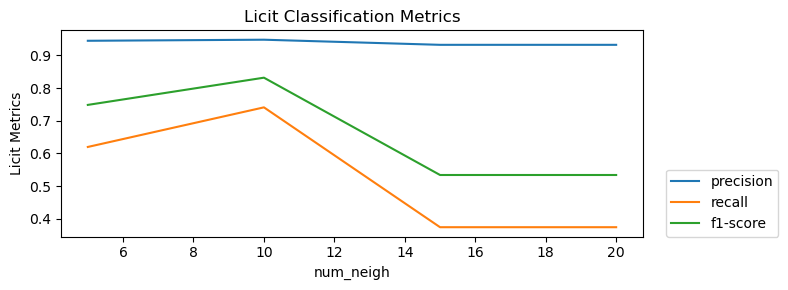

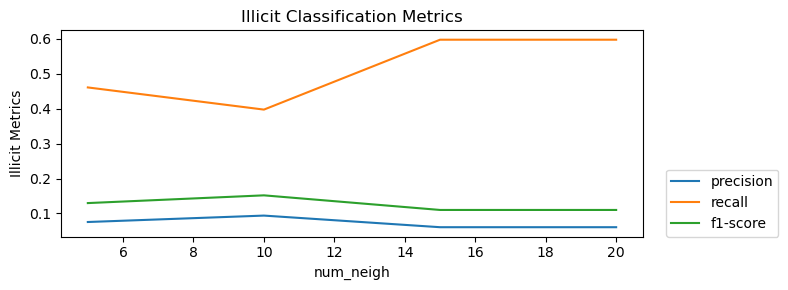

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Epochs

In [ ]:
metrics = create_metrics()
para_change = "epoch"
para_list = [10, 20 , 30 , 40, 50]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 165], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x000001B984151B40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 20, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 465444.5772 | 
Epoch 0001: Loss 38810.1267 | 
Epoch 0002: Loss 14237.3595 | 
Epoch 0003: Loss 10276.7989 | 
Epoch 0004: Loss 11324.3997 | 
Epoch 0005: Loss 3186.1323 | 
Epoch 0006: Loss 1995.3417 | 
Epoch 0007: Loss 1574.8286 | 
Epoch 0008: Loss 2250.4098 | 
Epoch 0009: Loss 1515.3758 | 
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[25002, 165], edge_index=[2, 22868], y=[25002])
testing model...
Test: Loss 34.1798 | 
ROC AUC: 0.5465
Classificatio

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

NameError: name 'plot_metrics' is not defined

## DOMINANT using hybrid GCN/GAT backbone

In [4]:
config = {
        "model": {
            "hid_dim": 128,
            "num_layers": 4,
            "dropout": 0.2,
            "weight_decay": 0.0,
            "contamination": 0.1,
            "backbone": "hybrid",
            "lr": 0.005,
            "epoch": 10,
            "batch_size": 2048,
            "num_neigh": 10,
            "weight": 0.5,
            "verbose": 1,
        },
        "data": {
            "use_aggregated": True,
            "use_temporal": False,
            "batch_size": 16000
        },
        "training": {
            "save_embeddings": False,
            "save_dir": "./saved_models",
        },
        "classifiers": ["rf", "mlp"],
    }

#### Number of layers

In [5]:
metrics = create_metrics()
para_change = "num_layers"
para_list = [2, 3, 4, 5, 6,7]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30451, 165], edge_index=[2, 28955], y=[30451])
creating model with {'hid_dim': 128, 'num_layers': 2, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x7f4fb6f7ed40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 828.1394 | 
Epoch 0001: Loss 379.5417 | 
Epoch 0002: Loss 298.4041 | 
Epoch 0003: Loss 216.2574 | 
Epoch 0004: Loss 165.4466 | 
Epoch 0005: Loss 161.6224 | 
Epoch 0006: Loss 154.4213 | 
Epoch 0007: Loss 107.2314 | 
Epoch 0008: Loss 75.5373 | 
Epoch 0009: Loss 54.8243 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[24916, 165], edge_index=[2, 22816], y=[24916])
testing model...
Test: Loss 1.6984 | 
ROC AUC: 0.4097
Classification Report:
     

: 

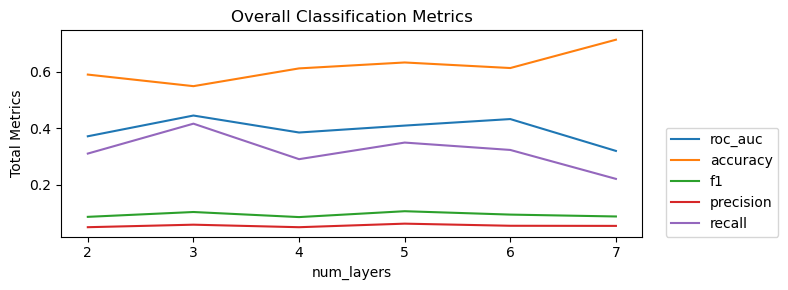

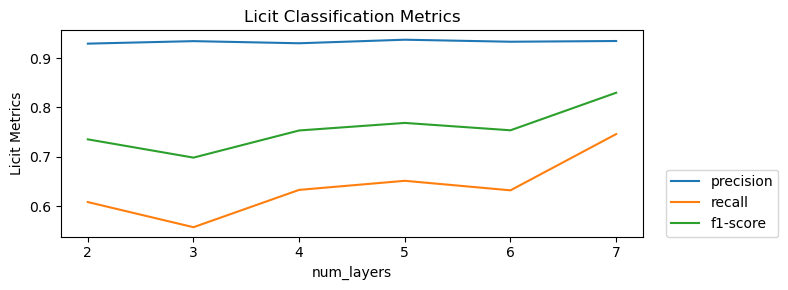

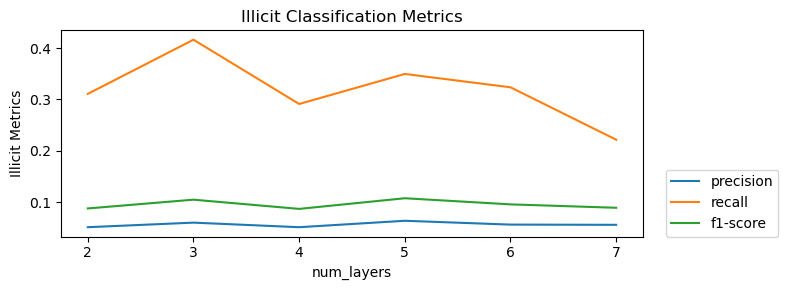

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Hidden Dimension

In [ ]:
metrics = create_metrics()
para_change = "hid_dim"
para_list = [64, 128, 256, 512, 1024]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 165], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 64, 'num_layers': 7, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x00000252FC8A04C0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 317.5365 | 
Epoch 0001: Loss 196.4156 | 
Epoch 0002: Loss 125.6235 | 
Epoch 0003: Loss 86.6486 | 
Epoch 0004: Loss 66.0210 | 
Epoch 0005: Loss 57.4883 | 
Epoch 0006: Loss 52.4820 | 
Epoch 0007: Loss 57.9326 | 
Epoch 0008: Loss 44.5620 | 
Epoch 0009: Loss 35.7596 | 
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[24958, 165], edge_index=[2, 22786], y=[24958])
testing model...
Test: Loss 1.1957 | 
ROC AUC: 0.3436
Classification Report:
       

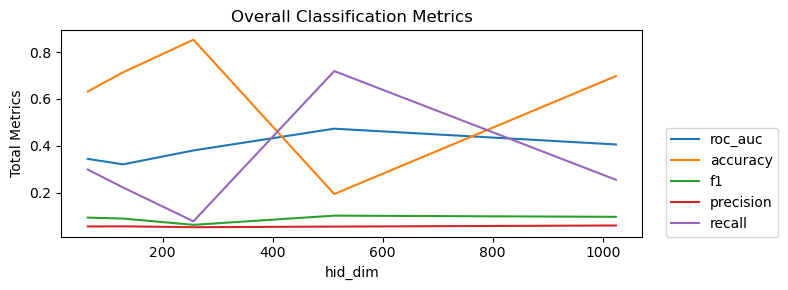

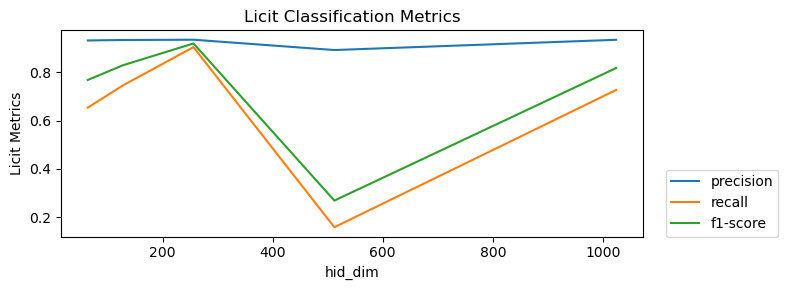

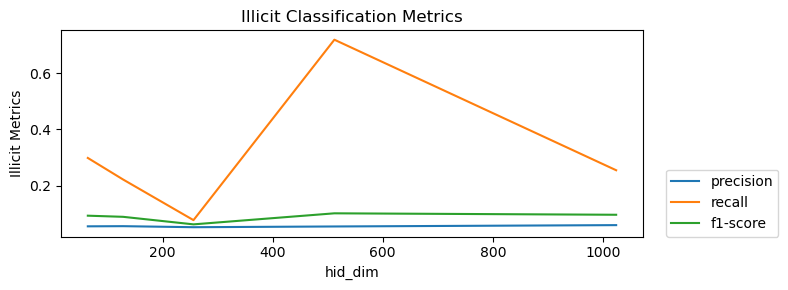

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Dropout

In [ ]:
metrics = create_metrics()
para_change = "dropout"
para_list = [0.0, 0.1, 0.2, 0.3]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 165], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.0, 'weight_decay': 0.0, 'act': <function relu at 0x00000252FC8A04C0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 5083.5292 | 
Epoch 0001: Loss 2211.8918 | 
Epoch 0002: Loss 1197.6975 | 
Epoch 0003: Loss 1122.1066 | 
Epoch 0004: Loss 2207.1689 | 
Epoch 0005: Loss 1329.8026 | 
Epoch 0006: Loss 697.5494 | 
Epoch 0007: Loss 373.7653 | 
Epoch 0008: Loss 536.5870 | 
Epoch 0009: Loss 341.2108 | 
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[24917, 165], edge_index=[2, 22796], y=[24917])
testing model...
Test: Loss 4.7016 | 
ROC AUC: 0.3574
Classification 

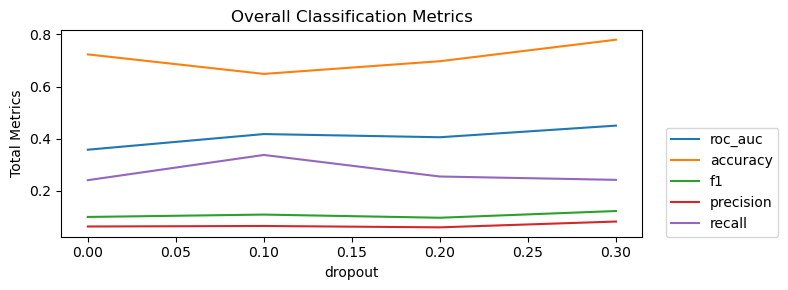

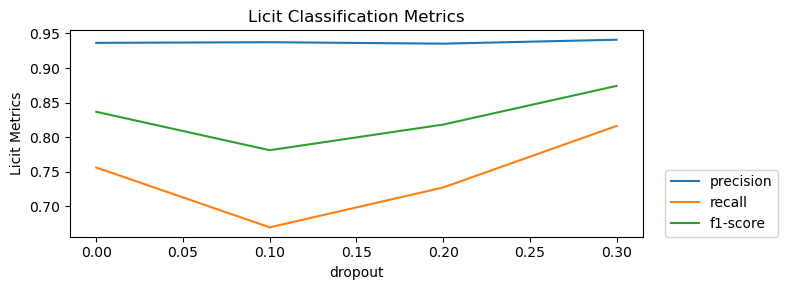

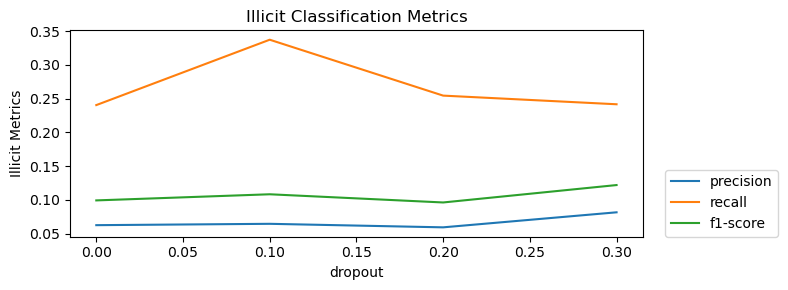

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Number of neighbors

In [ ]:
metrics = create_metrics()
para_change = "num_neigh"
para_list = [5,10,15,20]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 165], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x00000252FC8A04C0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 5, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 5544.1213 | 
Epoch 0001: Loss 2628.9364 | 
Epoch 0002: Loss 1685.3952 | 
Epoch 0003: Loss 1664.7786 | 
Epoch 0004: Loss 1028.4484 | 
Epoch 0005: Loss 690.9082 | 
Epoch 0006: Loss 564.2282 | 
Epoch 0007: Loss 339.1969 | 
Epoch 0008: Loss 246.3083 | 
Epoch 0009: Loss 184.5868 | 
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[24914, 165], edge_index=[2, 22804], y=[24914])
testing model...
Test: Loss 11.3680 | 
ROC AUC: 0.4583
Classification R

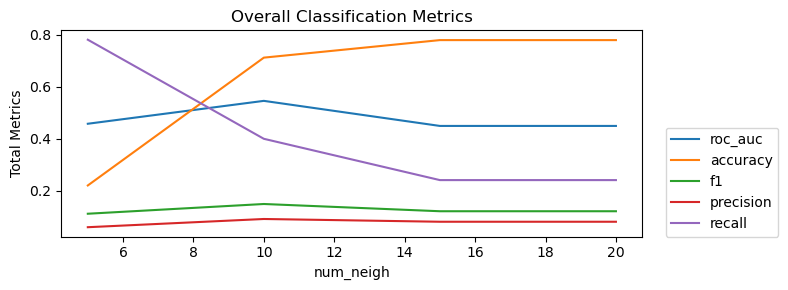

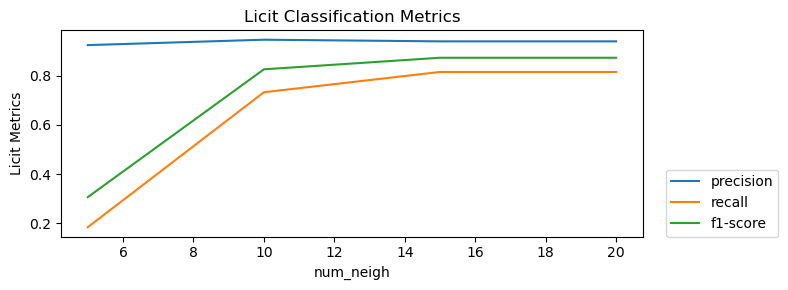

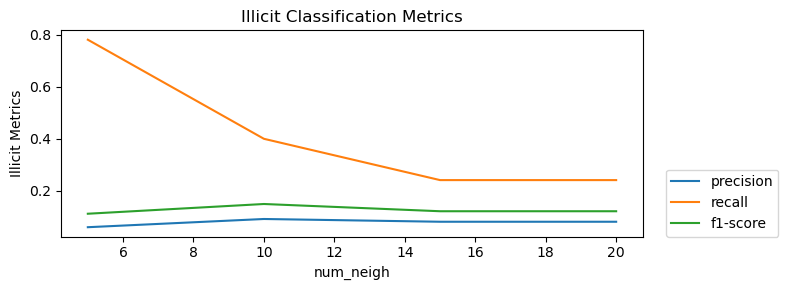

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Epochs

In [ ]:
metrics = create_metrics()
para_change = "epoch"
para_list = [10, 20 , 30 , 40, 50]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[30374, 165], edge_index=[2, 28954], y=[30374])
creating model with {'hid_dim': 1024, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x00000252FC8A04C0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 20, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 6710.4941 | 
Epoch 0001: Loss 2986.2601 | 
Epoch 0002: Loss 2061.5396 | 
Epoch 0003: Loss 1743.7317 | 
Epoch 0004: Loss 1111.8470 | 
Epoch 0005: Loss 838.2488 | 
Epoch 0006: Loss 718.8508 | 
Epoch 0007: Loss 512.1489 | 
Epoch 0008: Loss 438.2354 | 
Epoch 0009: Loss 335.6214 | 
model training complete!
embeddings saved to ./outputs\embeddings_None.npy
labels saved to ./outputs\labels_None.npy
data loaded from loader:
Data(x=[24965, 165], edge_index=[2, 22805], y=[24965])
testing model...
Test: Loss 18.9319 | 
ROC AUC: 0.4499
Classification 

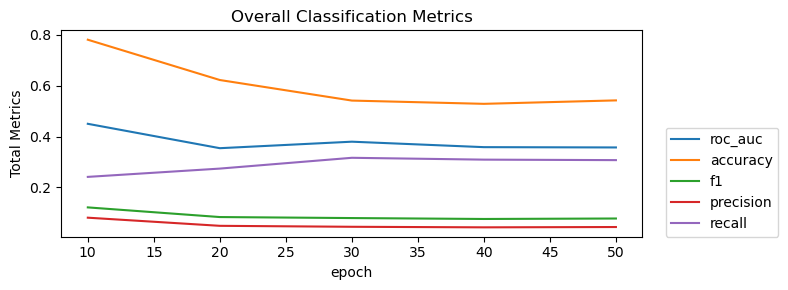

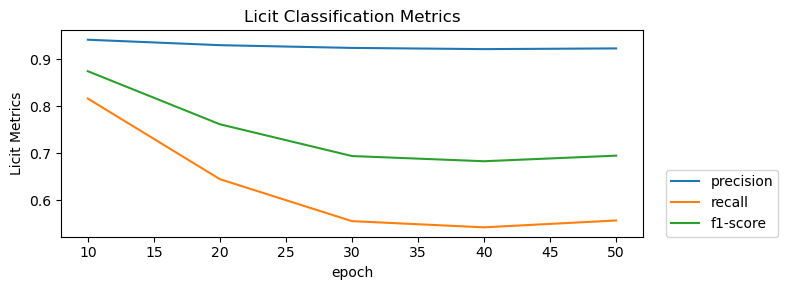

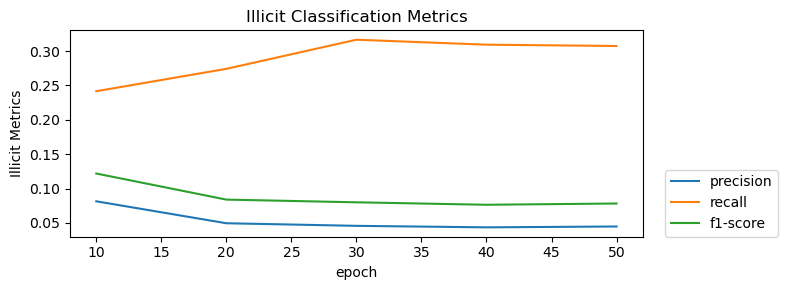

In [ ]:
plot_metrics(metrics, para_list, para_change, x_log=False)